## Needed Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
import os
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [3]:
path = r'Data'
files = Path(path).glob('*.csv')

In [4]:
dfs = list()
for f in files:
    data = pd.read_csv(f)
    data['file'] = f.stem
    dfs.append(data)

In [6]:
drops = {'Unnamed: 0', 'day', 'file'}
for df in dfs:
    df.rename(columns={"value": f'{df.file[0]}'}, inplace=True)
    df.drop(drops, inplace=True, axis=1)
    df.reset_index(inplace=True)

In [7]:
df = pd.DataFrame({'index' : range(0,710)})

for d in dfs:
    df = pd.merge(df, d, on="index")

In [8]:
df1 = df.copy()
df = df.transpose()

In [9]:
df.drop('index', inplace=True)
df1.drop('index', axis=1, inplace=True)

## EDA on the Store's Data

In [13]:
df1.iloc[: ,-4:].describe()

,data_996,data_997,data_998,data_999
count,710.000000,710.000000,710.000000,710.000000
mean,3.105366,6.362028,11.697732,3.034155
std,9.704386,24.474525,31.981399,16.994311
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,4.037500,0.000000
max,80.340000,274.090000,245.670000,270.090000


In [258]:
df.iloc[: ,-6:].describe()

,sum,positive_count,avg_buy_per_day,color
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,3305.868536,93.005200,34.605900,0.568800
std,3395.522501,76.285732,19.588823,0.874513
min,14.170000,4.000000,3.211429,0.000000
25%,999.332500,37.000000,20.922604,0.000000
50%,2232.740000,73.000000,30.787425,0.000000
75%,4518.312500,126.000000,44.210507,2.000000
max,38405.050000,523.000000,177.443600,2.000000


In [14]:
df1['sum'] = df1.sum(axis=1) # total sales of a day
df1['order_counts'] = df1.apply(lambda x: sum(x>0), axis=1) # total orders of a day
df1['avg_sales_per_day'] = df1['sum'] / df1['order_counts']

In [17]:
df1

,data_1,data_10,data_100,data_1000,data_1001,data_1002,data_1003,data_1004,data_1005,data_1006,...,data_993,data_994,data_995,data_996,data_997,data_998,data_999,sum,order_counts,avg_sales_per_day
0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0,NaN
1,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,549.31,14,39.236429
2,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,458.91,13,35.300769
3,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1560.37,34,45.893235
4,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1785.64,37,48.260541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0.00,0.0,0.0,0.00,0.00,3.79,0.0,4.79,0.00,0.0,...,0.0,0.0,0.0,1.20,0.0,0.0,0.0,16477.93,368,44.776984
706,81.29,0.0,0.0,53.22,87.83,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,39.5,0.0,0.0,11443.89,328,34.889909
707,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,11.11,0.0,0.0,0.0,10632.36,311,34.187653
708,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,8.49,0.0,...,0.0,0.0,0.0,11.00,0.0,0.0,0.0,9949.90,316,31.487025


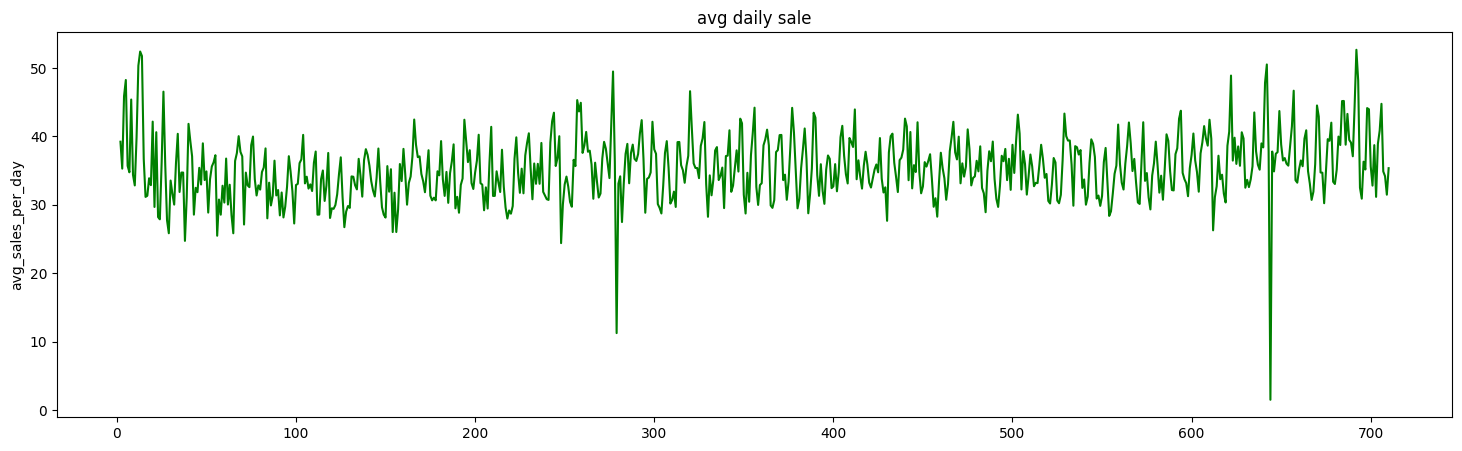

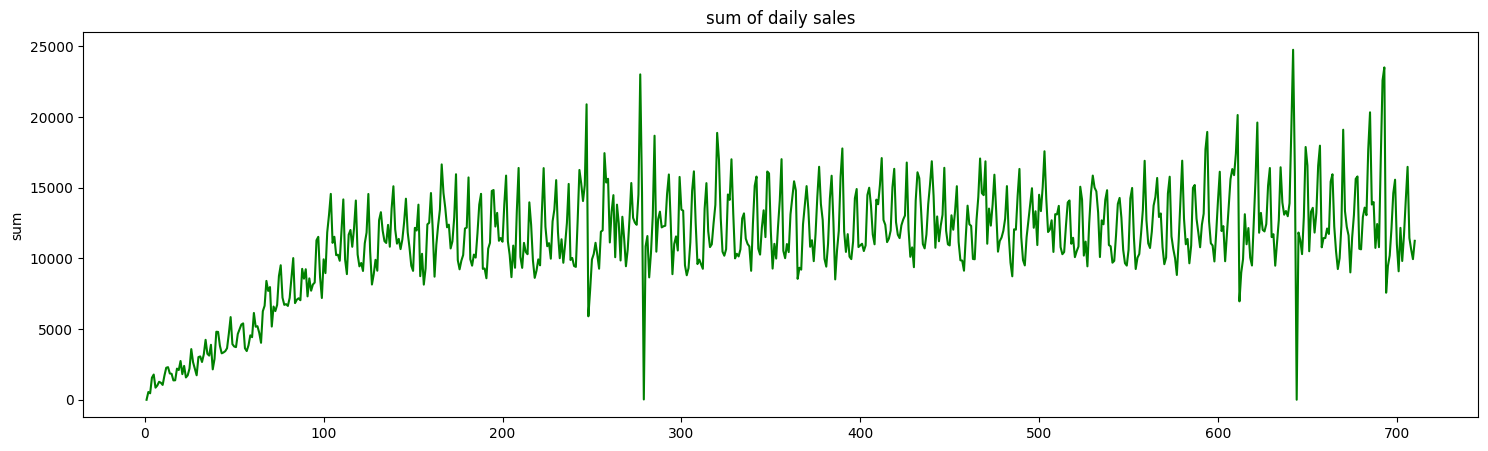

In [50]:
plt.figure(figsize=(18,5))
plt.title("avg daily sale")
sns.lineplot(y=df1['avg_sales_per_day'], x=range(1,711), color='g')
plt.show()

plt.figure(figsize=(18,5))
plt.title("sum of daily sales")
sns.lineplot(y=df1['sum'], x=range(1,711), color='g')
plt.show()

#### as we can see there's been a growth in sum of daily sales values in first 100 days and after that the trend was pretty much neutral.
#### but the avg daily sale is more consistant and there is no bold trends.
#### overall the trend is pretty consitant for both avg sales and number of sales.
#### we can observe 2 special points(days) on the chart which in, daily sales values had been lower than other days(almost 280th day of the year), which can be a big holiday or something

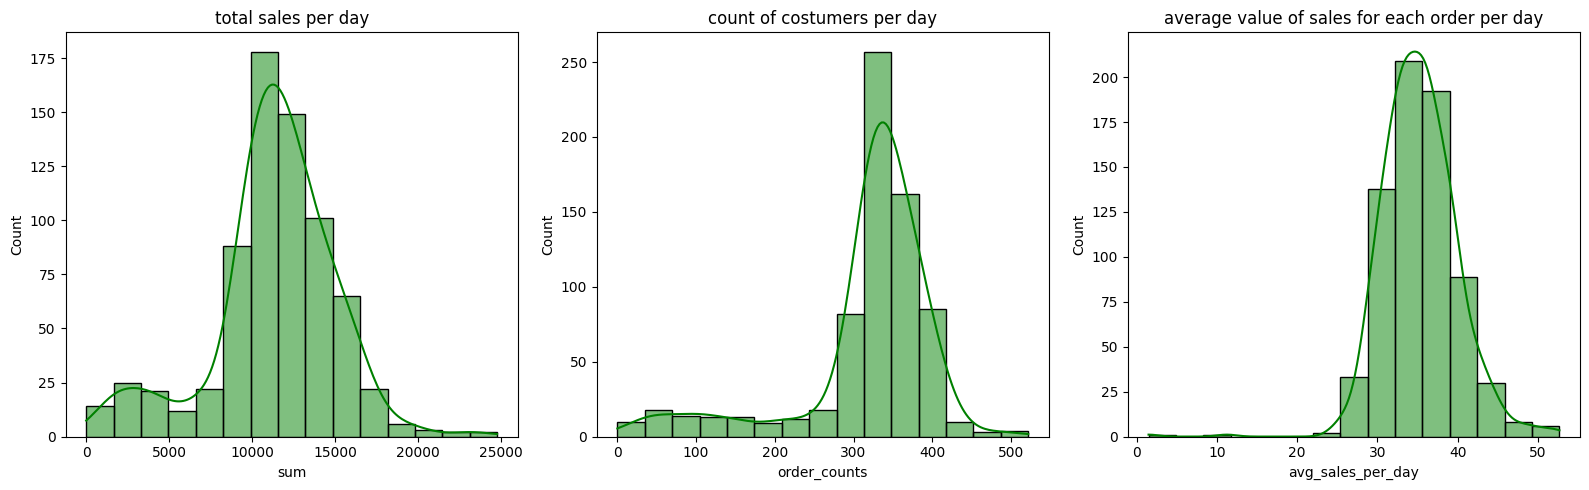

In [51]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(df1['sum'],color='green', bins=15, kde=True)
plt.title("total sales per day")

plt.subplot(1,3,2)
sns.histplot(df1['order_counts'],color='green', bins=15, kde=True)
plt.title("count of costumers per day")

plt.subplot(1,3,3)
sns.histplot(df1['avg_sales_per_day'],color='green', bins=15, kde=True)
plt.title("average value of sales for each order per day")

plt.tight_layout()
plt.show()

## EDA on the Costumers' Data

In [52]:
df['sum'] = df.sum(axis=1)
df['positive_count'] = df.apply(lambda x: sum(x>0), axis=1) # days with at least one order
df['avg_buy_per_day'] = df['sum'] / df['positive_count']

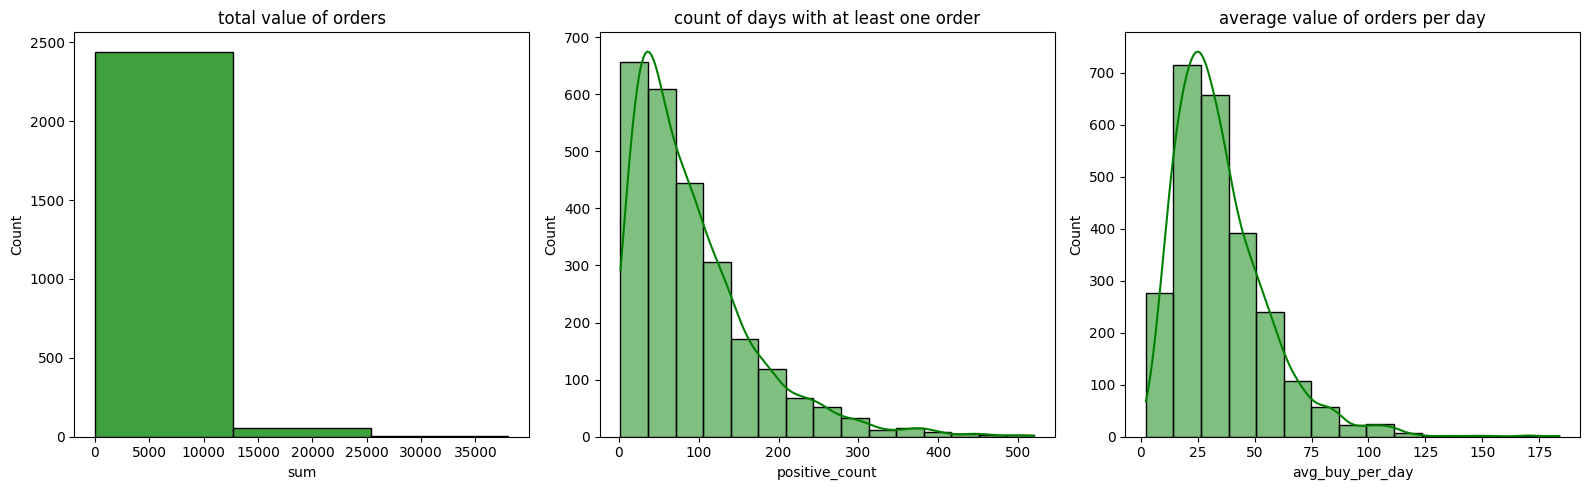

In [53]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(df['sum'],color='green', bins=3)
plt.title("total value of orders")

plt.subplot(1,3,2)
sns.histplot(df['positive_count'],color='green', bins=15, kde=True)
plt.title("count of days with at least one order")

plt.subplot(1,3,3)
sns.histplot(df['avg_buy_per_day'],color='green', bins=15, kde=True)
plt.title("average value of orders per day")

plt.tight_layout()
plt.show()

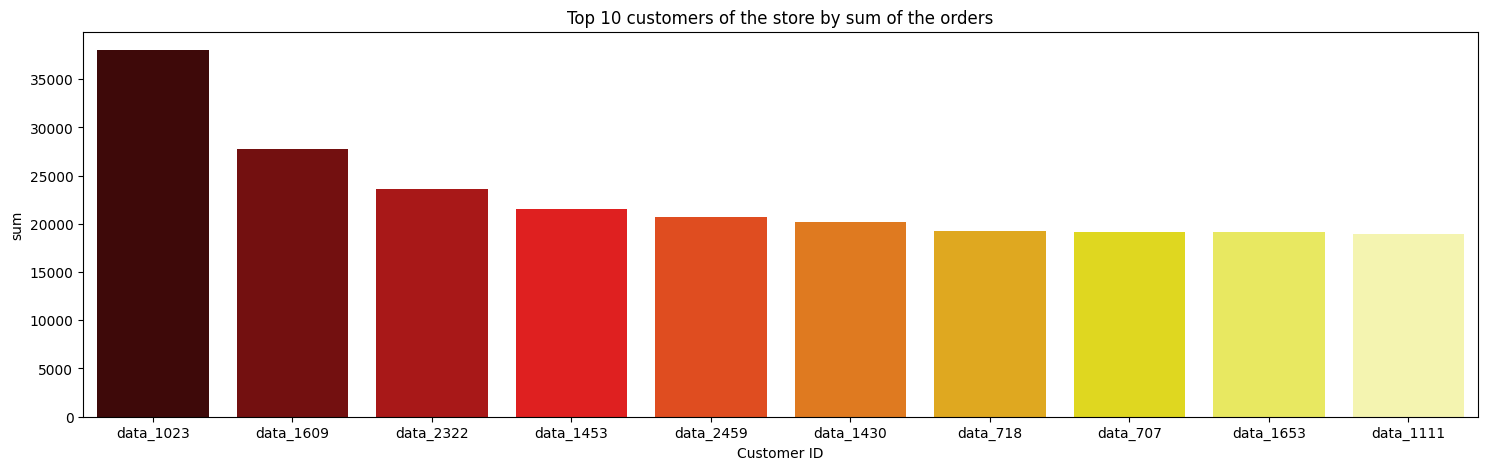

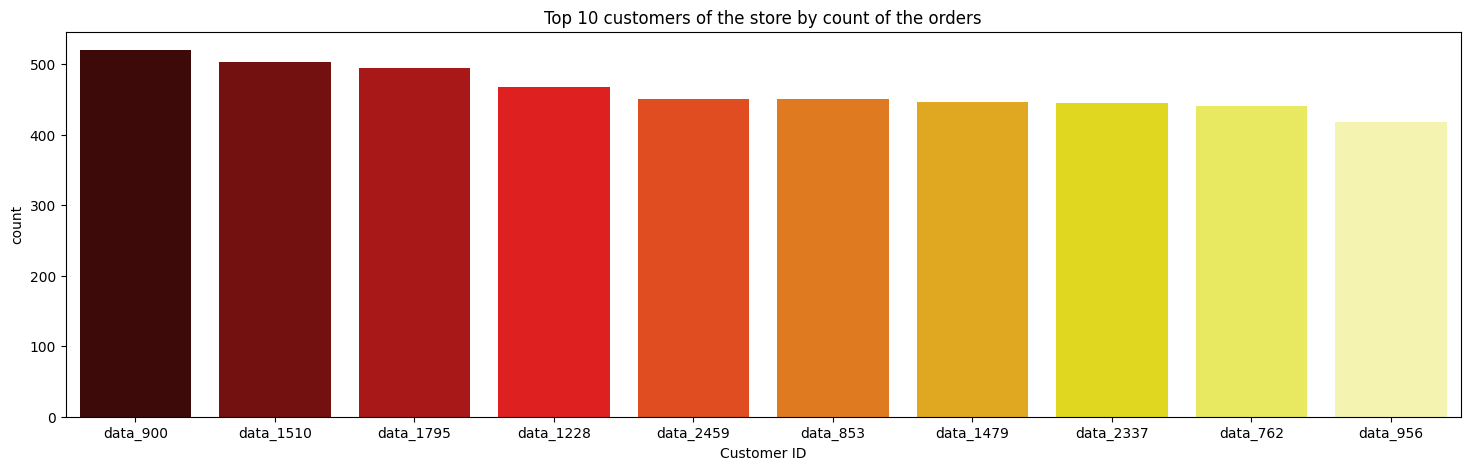

In [65]:
top_values = df.nlargest(10, 'sum')
plt.figure(figsize=(18,5))
sns.barplot(x=top_values.index, y=top_values['sum'], palette='hot')
plt.xlabel('Customer ID')
plt.ylabel('sum')
plt.title(f'Top 10 customers of the store by sum of the orders')
plt.show()


top_values = df.nlargest(10, 'positive_count')
plt.figure(figsize=(18,5))
sns.barplot(x=top_values.index, y=top_values['positive_count'], palette='hot')
plt.xlabel('Customer ID')
plt.ylabel('count')
plt.title(f'Top 10 customers of the store by count of the orders')
plt.show()




## Clustering

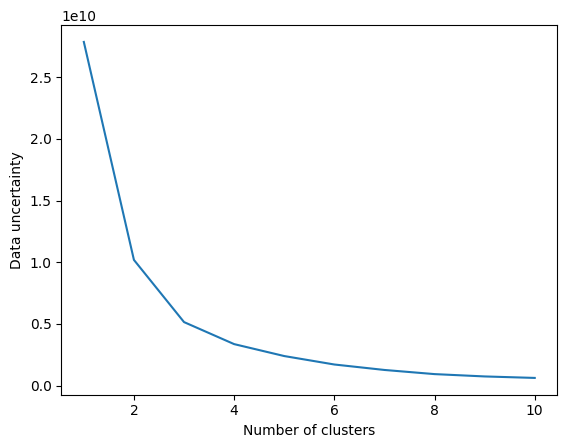

In [67]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df.iloc[: , -3:])
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

In [68]:
km = KMeans(n_clusters=3)
km.fit(df.iloc[: , -3:])
labels = km.labels_

In [69]:
labels

array([2, 0, 0, ..., 2, 2, 0])

In [70]:
df['color'] = labels.reshape(-1, 1)

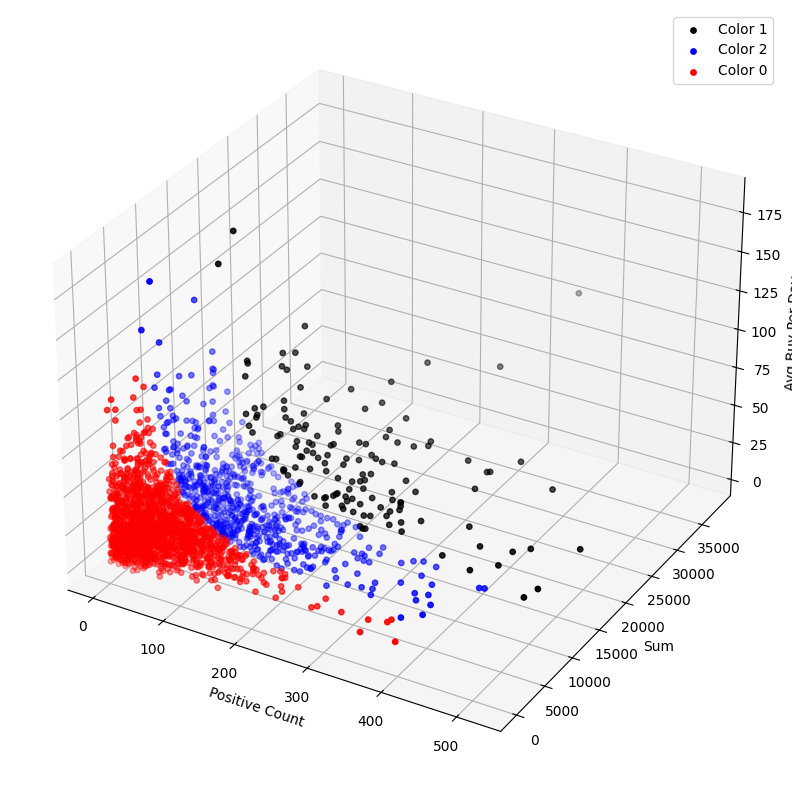

In [78]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X = df[df['color'] == 1]
Y = df[df['color'] == 2]
Z = df[df['color'] == 0]

ax.scatter(X['positive_count'], X['sum'], X['avg_buy_per_day'], c="black", s=15, label='Color 1')
ax.scatter(Y['positive_count'], Y['sum'], Y['avg_buy_per_day'], c="blue", s=15, label='Color 2')
ax.scatter(Z['positive_count'], Z['sum'], Z['avg_buy_per_day'], c="red", s=15, label='Color 0')

ax.set_xlabel('Positive Count')
ax.set_ylabel('Sum')
ax.set_zlabel('Avg Buy Per Day')

ax.legend()

plt.show()


In [79]:
df['any order in last 30 days'] = df1.apply(lambda x: np.array(list(x)[-30:]).sum() > 0)

In [80]:
df['is leaving'] = ((df['color'] == 0) & (df['any order in last 30 days'] == False))

In [81]:
df['is leaving'].value_counts()

is leaving
False    2065
True      435
Name: count, dtype: int64

In [82]:
df2 = df[df['is leaving'] == True]

#### I tried to predict which costumers are leaving the store using two factors, first the KMeans cluster of most unactive costumers and second a boolean that shows whether a customer have had any order in the last 30 days by combining these 2 factors we can separate 437 unique customers which are more likely to leave.